# IMPORTING NECESSARY LIBRARIES

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

# DATA UNDERSTANDING

In [2]:
df=pd.read_csv('city_day.csv')

In [3]:
df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [4]:
df.shape

(29531, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [8]:
df.nunique()

City             26
Date           2009
PM2.5         11716
PM10          12571
NO             5776
NO2            7404
NOx            8156
NH3            5922
CO             1779
SO2            4761
O3             7699
Benzene        1873
Toluene        3608
Xylene         1561
AQI             829
AQI_Bucket        6
dtype: int64

In [9]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

# DATA VISUALIZATION

In [10]:
sns.pairplot(df)

In [11]:
label_encoder = LabelEncoder()
df['AQI_Bucket'] = label_encoder.fit_transform(df['AQI_Bucket'])

In [12]:
df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI  AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           6  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           6  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           6  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           6  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           6  
...      ...    ...     ...      ...      ...     ...   ...         ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0           0  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0           3  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0           3  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0           3  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0           0  

[29531 rows x 16 columns]

In [13]:
df['City'].value_counts()

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64

In [14]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.City.hist()
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.plot()

[]

In [15]:
df['AQI'].value_counts()

AQI
102.0     223
100.0     222
70.0      208
106.0     208
78.0      198
         ... 
1044.0      1
679.0       1
1222.0      1
1459.0      1
13.0        1
Name: count, Length: 829, dtype: int64

[]

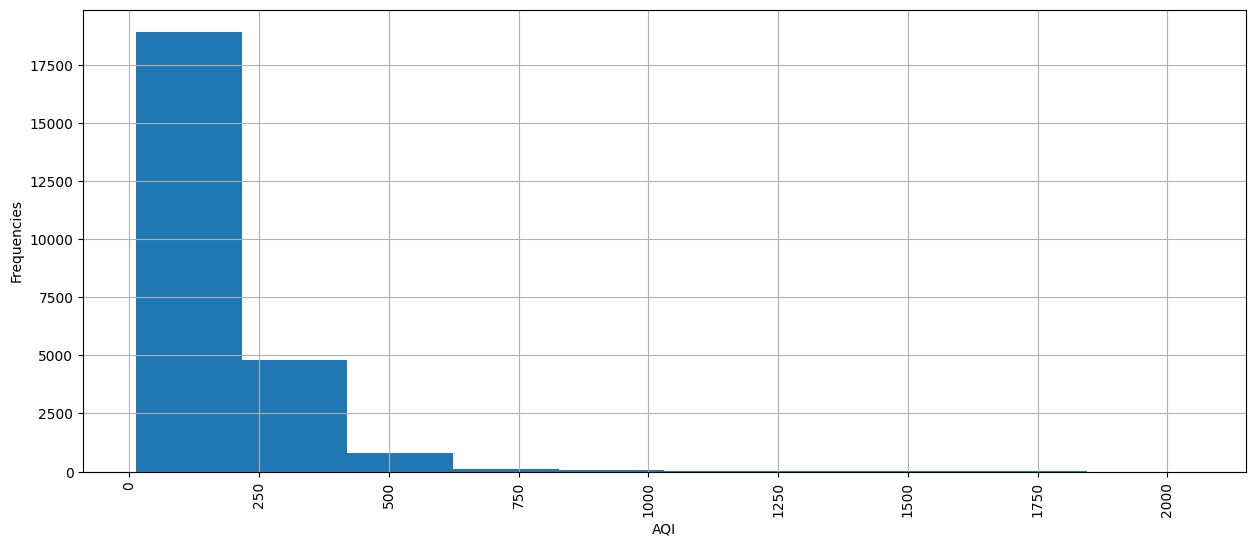

In [16]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.AQI.hist()
plt.xlabel('AQI')
plt.ylabel('Frequencies')
plt.plot()

In [17]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='PM2.5',data=df)

<Axes: xlabel='City', ylabel='PM2.5'>

<Axes: xlabel='City'>

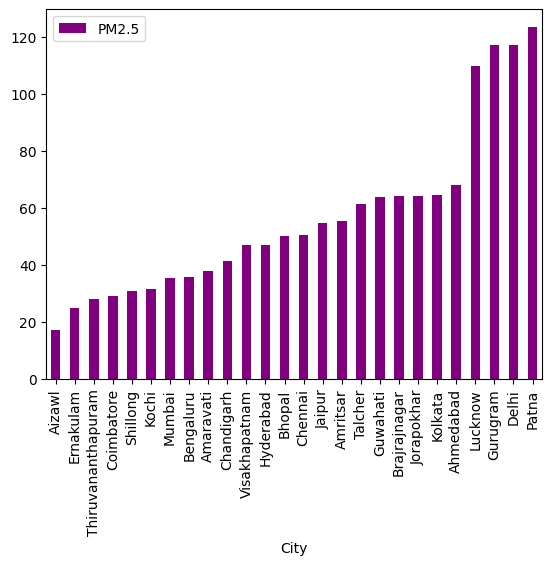

In [18]:
df[['PM2.5','City']].groupby(["City"]).mean().sort_values(by='PM2.5').plot.bar(color='purple')

<Axes: xlabel='City', ylabel='PM10'>

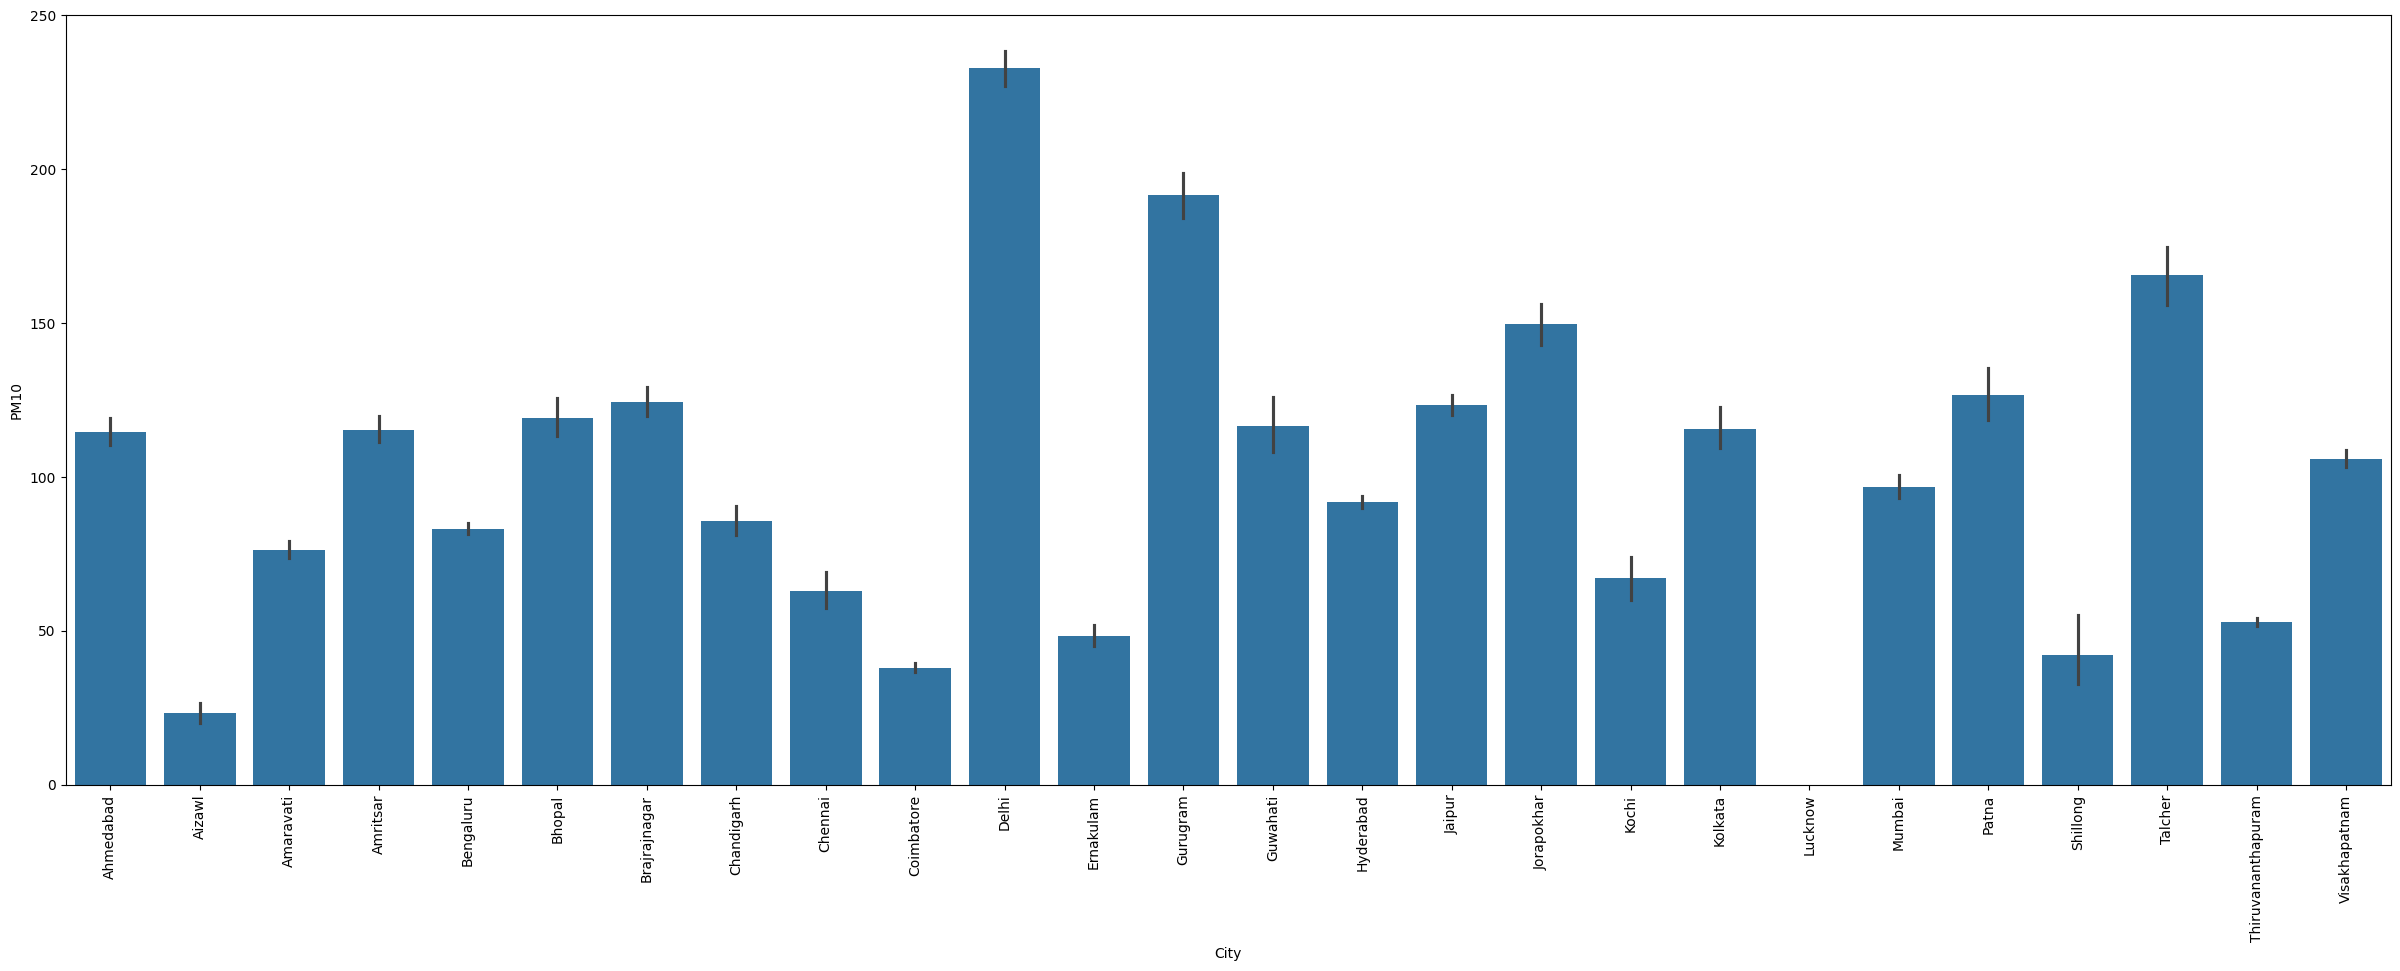

In [19]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='PM10',data=df)

<Axes: xlabel='City'>

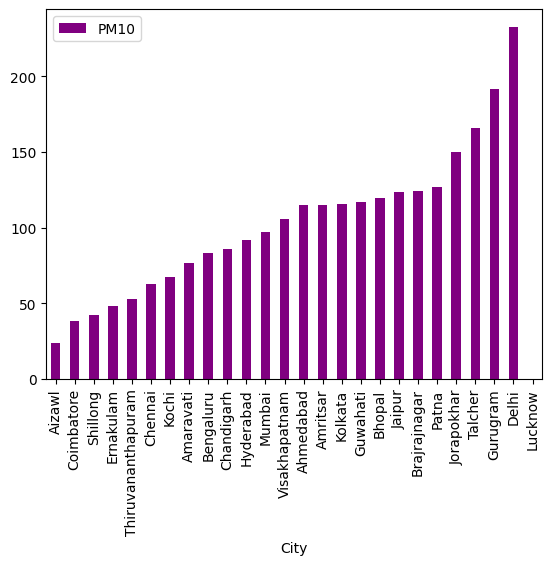

In [20]:
df[['PM10','City']].groupby(["City"]).mean().sort_values(by='PM10').plot.bar(color='purple')

In [21]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='NO',data=df)

<Axes: xlabel='City', ylabel='NO'>

<Axes: xlabel='City'>

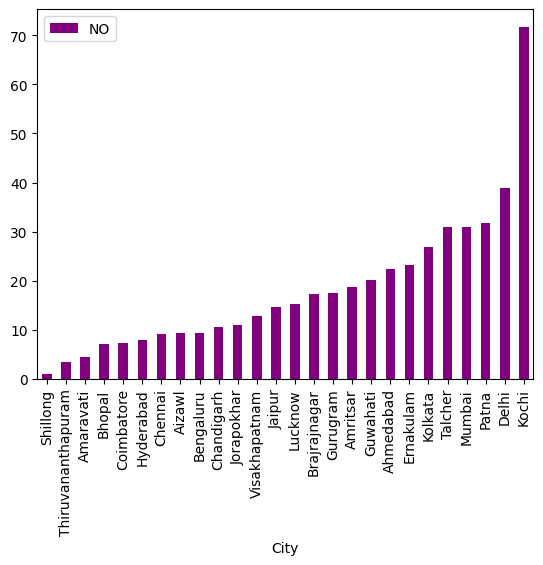

In [22]:
df[['NO','City']].groupby(["City"]).mean().sort_values(by='NO').plot.bar(color='purple')

<Axes: xlabel='City', ylabel='NO2'>

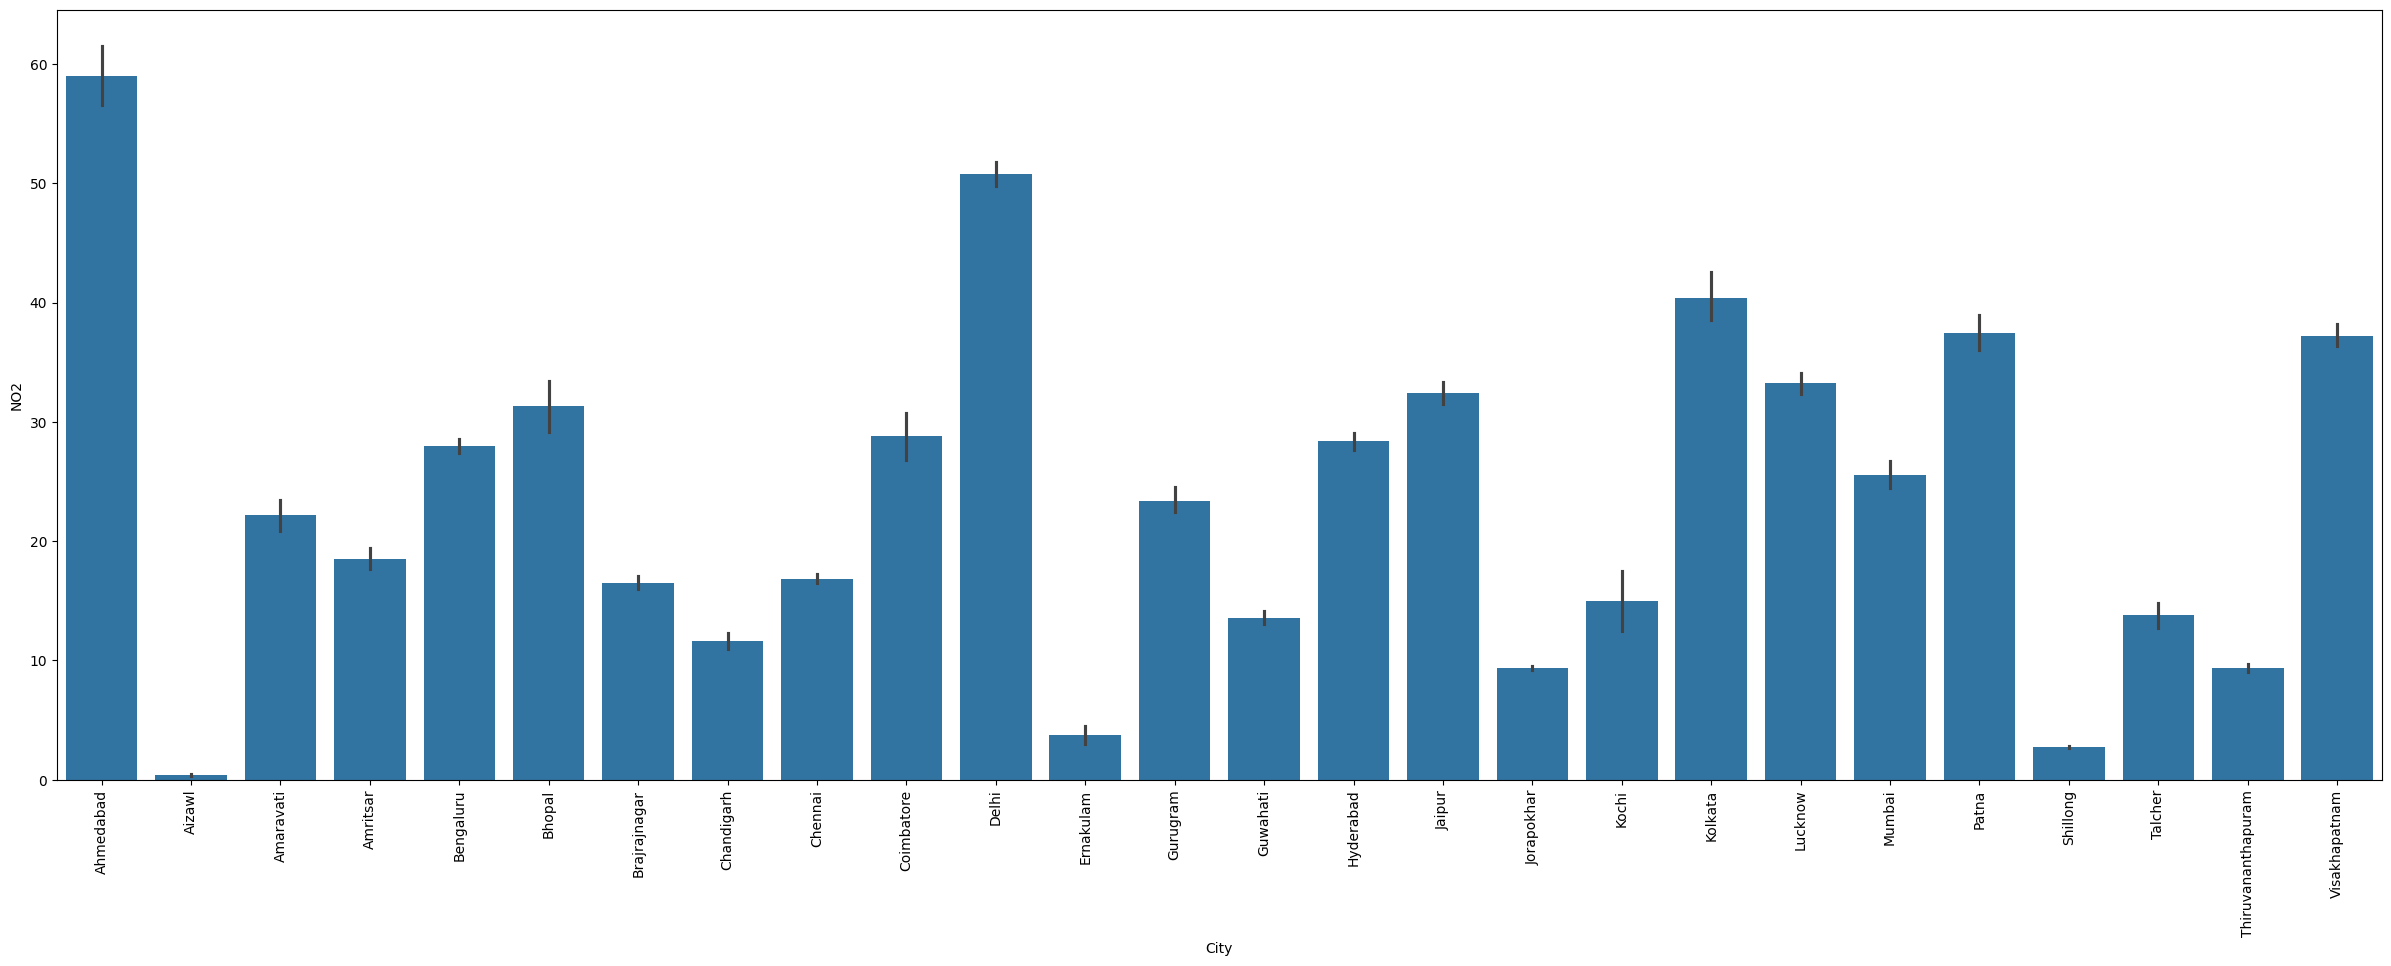

In [23]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='NO2',data=df)

<Axes: xlabel='City'>

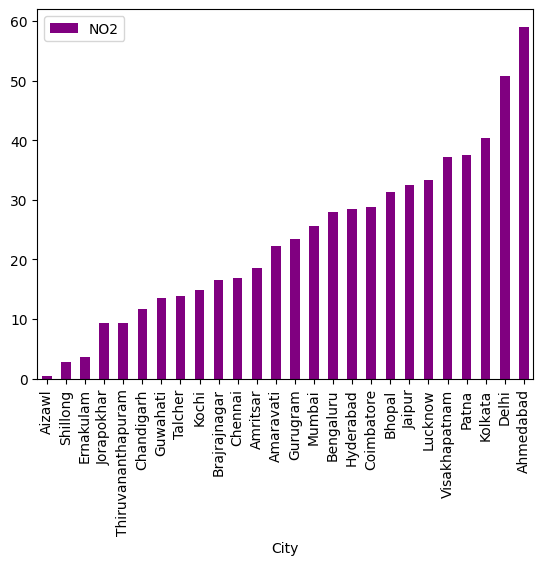

In [24]:
df[['NO2','City']].groupby(["City"]).mean().sort_values(by='NO2').plot.bar(color='purple')

<Axes: xlabel='City', ylabel='NOx'>

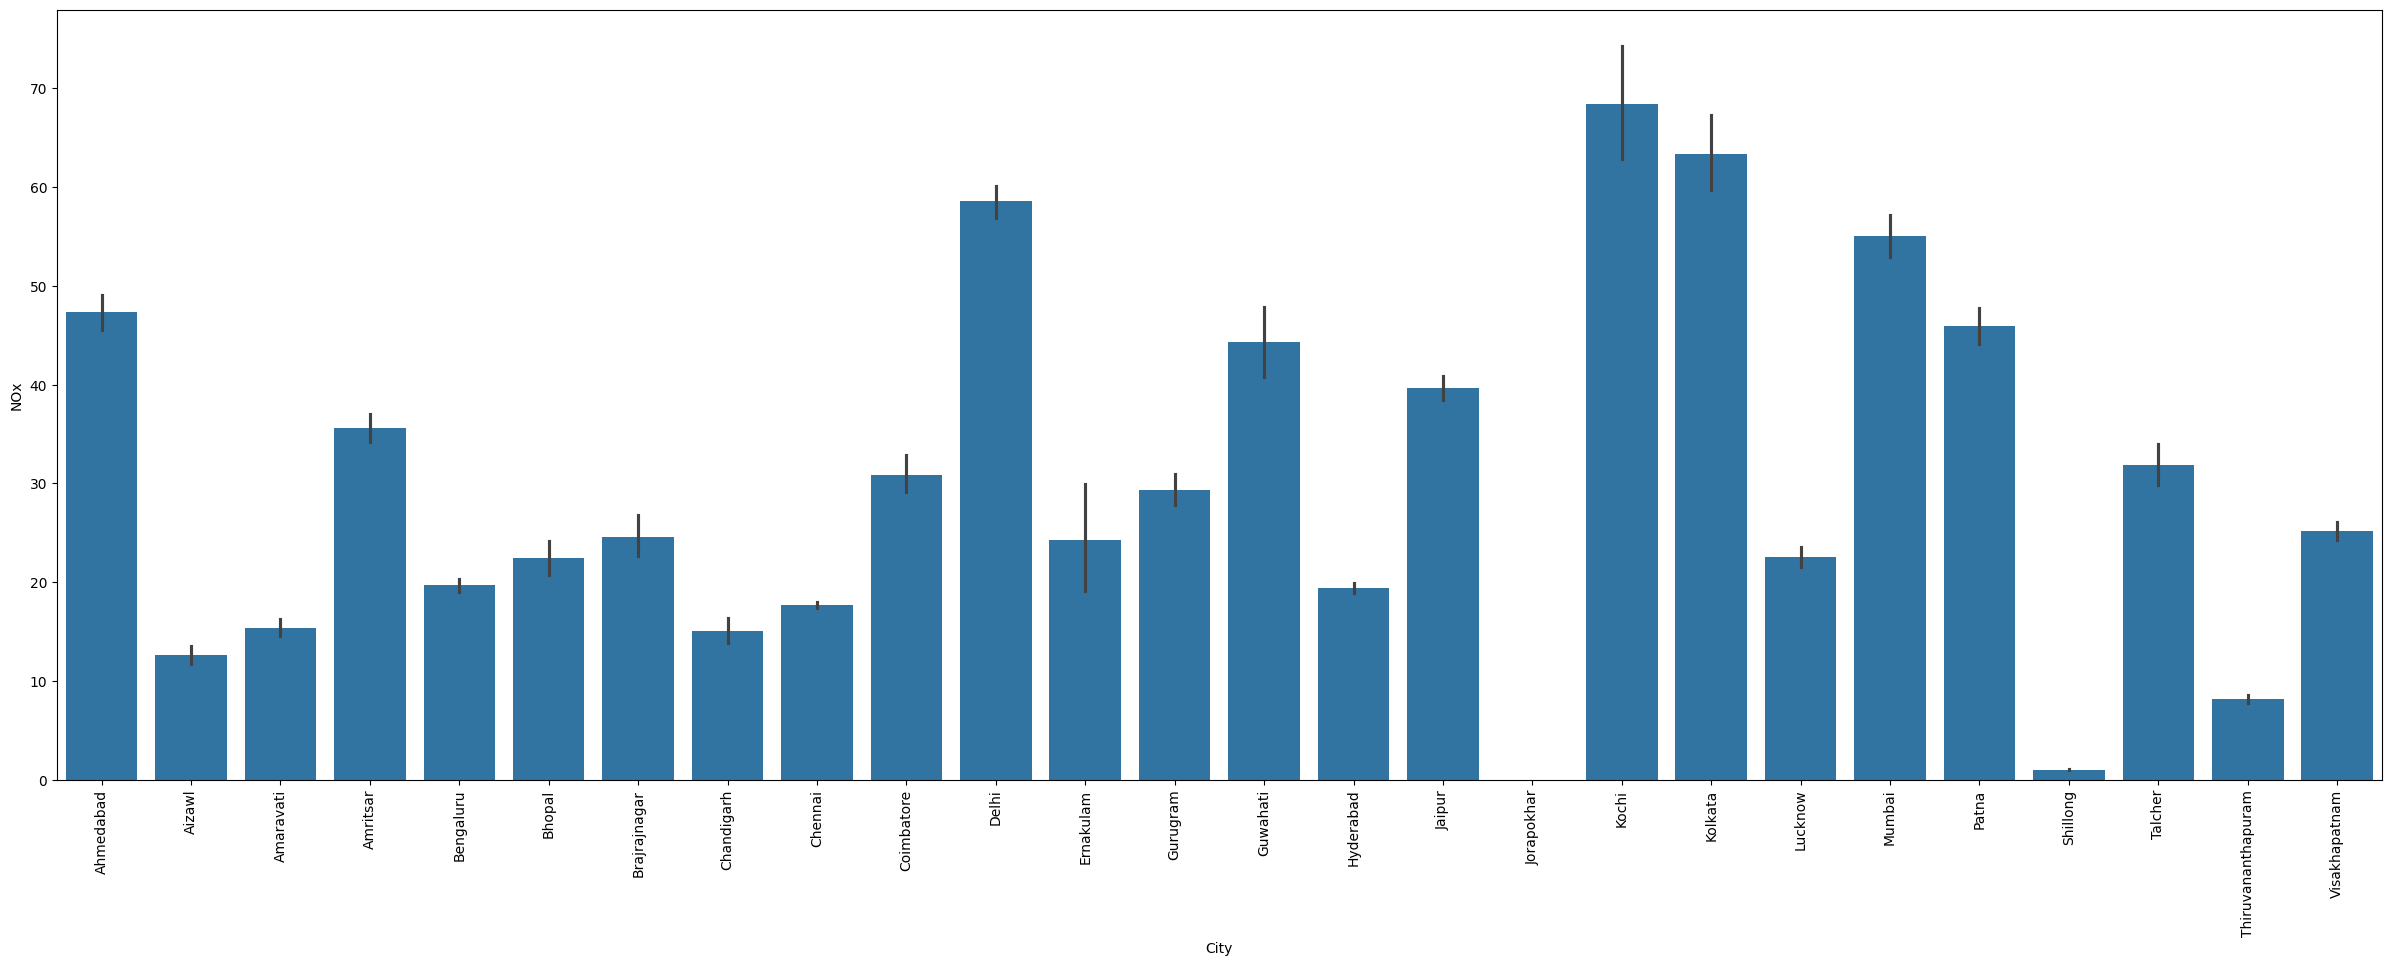

In [25]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='NOx',data=df)

In [26]:
df[['NOx','City']].groupby(["City"]).mean().sort_values(by='NOx').plot.bar(color='purple')

<Axes: xlabel='City'>

In [27]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='NH3',data=df)

<Axes: xlabel='City', ylabel='NH3'>

In [28]:
df[['NH3','City']].groupby(["City"]).mean().sort_values(by='NH3').plot.bar(color='purple')

<Axes: xlabel='City'>

In [29]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='CO',data=df)

<Axes: xlabel='City', ylabel='CO'>

In [30]:
df[['CO','City']].groupby(["City"]).mean().sort_values(by='CO').plot.bar(color='purple')

<Axes: xlabel='City'>

<Axes: xlabel='City', ylabel='SO2'>

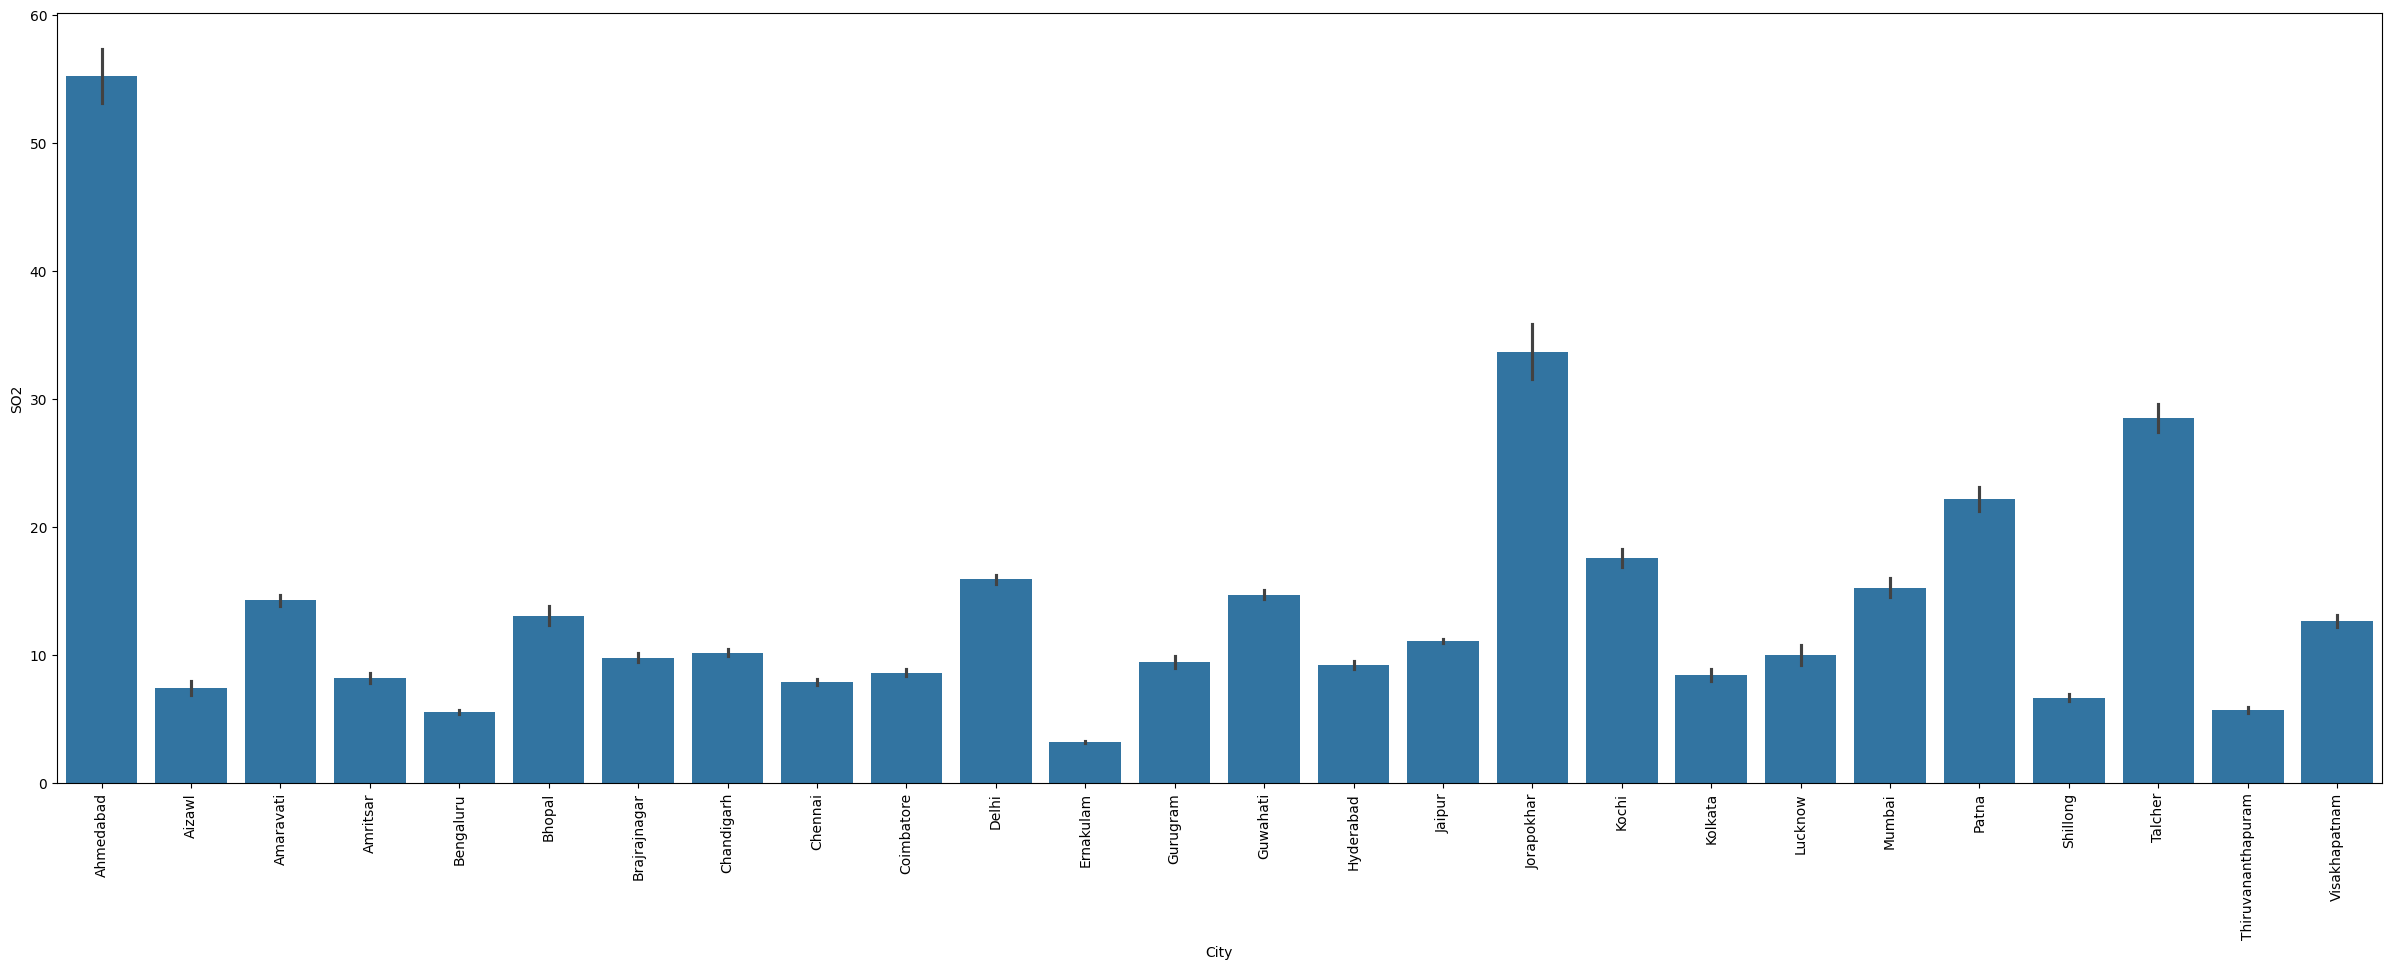

In [31]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='SO2',data=df)

<Axes: xlabel='City'>

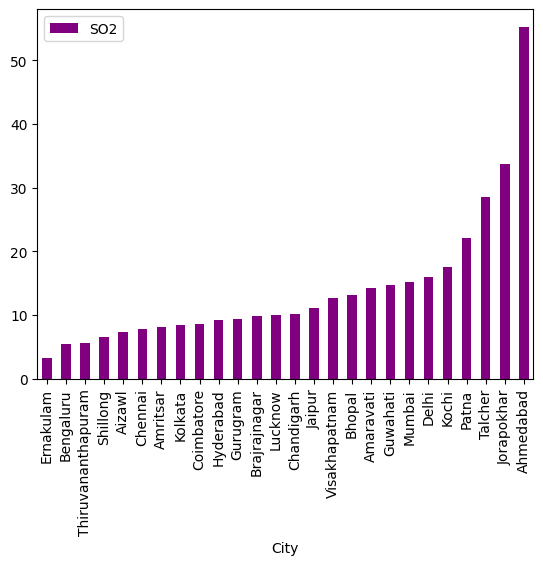

In [32]:
df[['SO2','City']].groupby(["City"]).mean().sort_values(by='SO2').plot.bar(color='purple')

In [33]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='O3',data=df)

<Axes: xlabel='City', ylabel='O3'>

In [34]:
df[['O3','City']].groupby(["City"]).mean().sort_values(by='O3').plot.bar(color='purple')

<Axes: xlabel='City'>

In [35]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='Benzene',data=df)

<Axes: xlabel='City', ylabel='Benzene'>

<Axes: xlabel='City'>

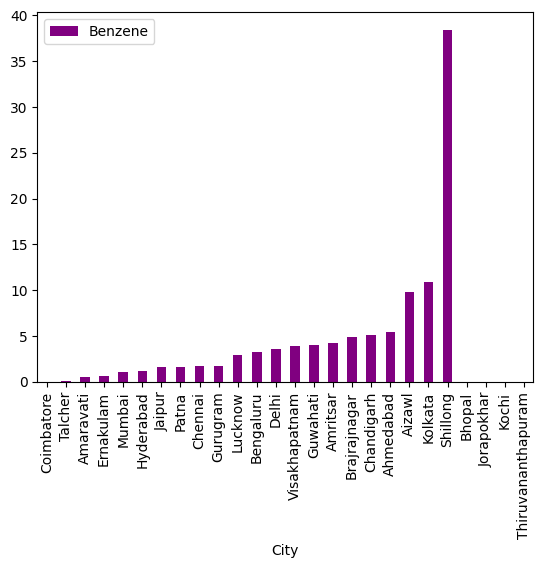

In [36]:
df[['Benzene','City']].groupby(["City"]).mean().sort_values(by='Benzene').plot.bar(color='purple')

In [37]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='Toluene',data=df)

<Axes: xlabel='City', ylabel='Toluene'>

<Axes: xlabel='City'>

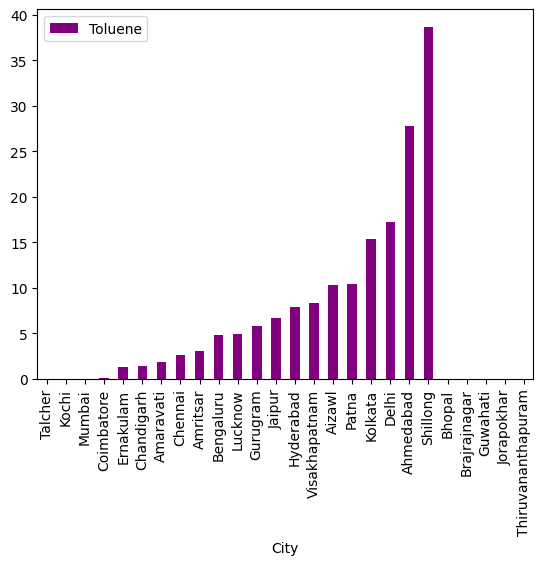

In [38]:
df[['Toluene','City']].groupby(["City"]).mean().sort_values(by='Toluene').plot.bar(color='purple')

In [39]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='Xylene',data=df)

<Axes: xlabel='City', ylabel='Xylene'>

<Axes: xlabel='City'>

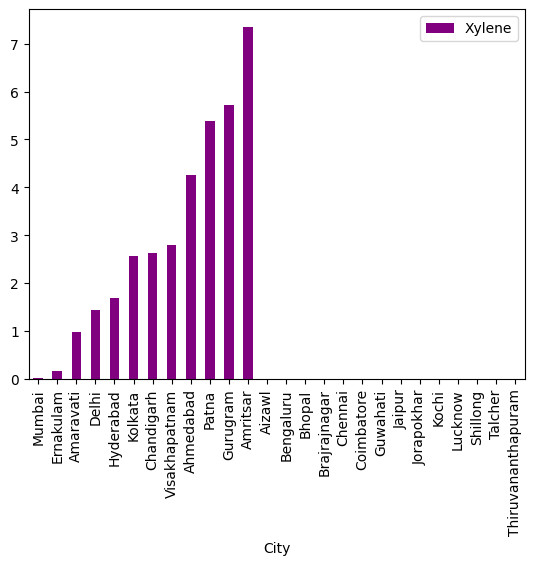

In [40]:
df[['Xylene','City']].groupby(["City"]).mean().sort_values(by='Xylene').plot.bar(color='purple')

<Axes: xlabel='City', ylabel='AQI'>

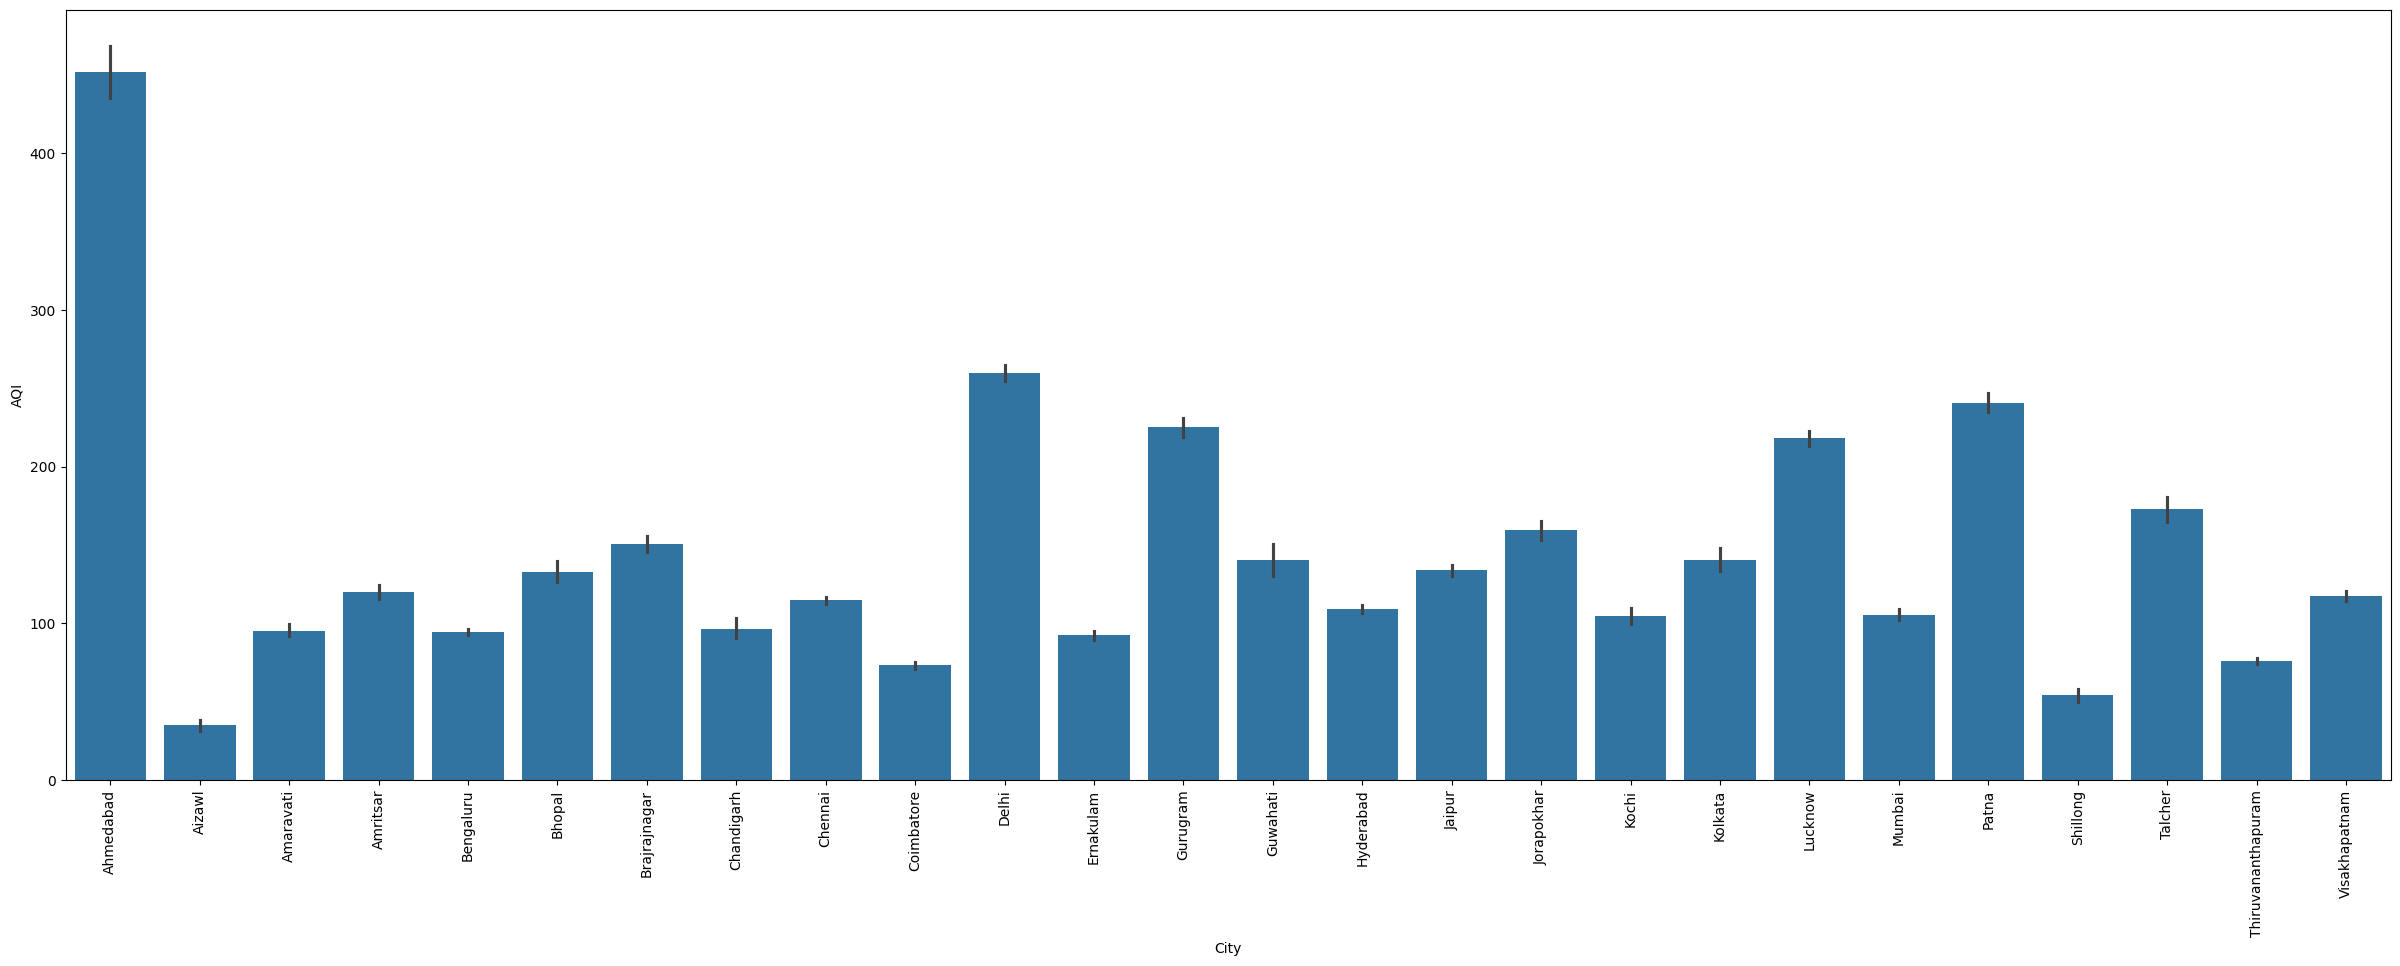

In [41]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='AQI',data=df)

<Axes: xlabel='City'>

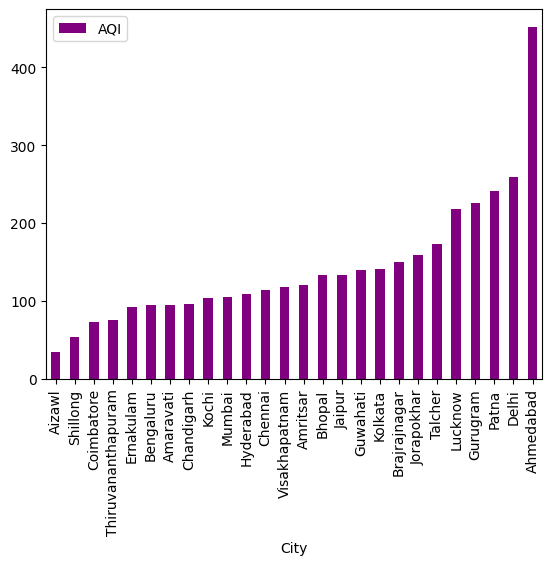

In [42]:
df[['AQI','City']].groupby(["City"]).mean().sort_values(by='AQI').plot.bar(color='purple')

<Axes: xlabel='City', ylabel='AQI_Bucket'>

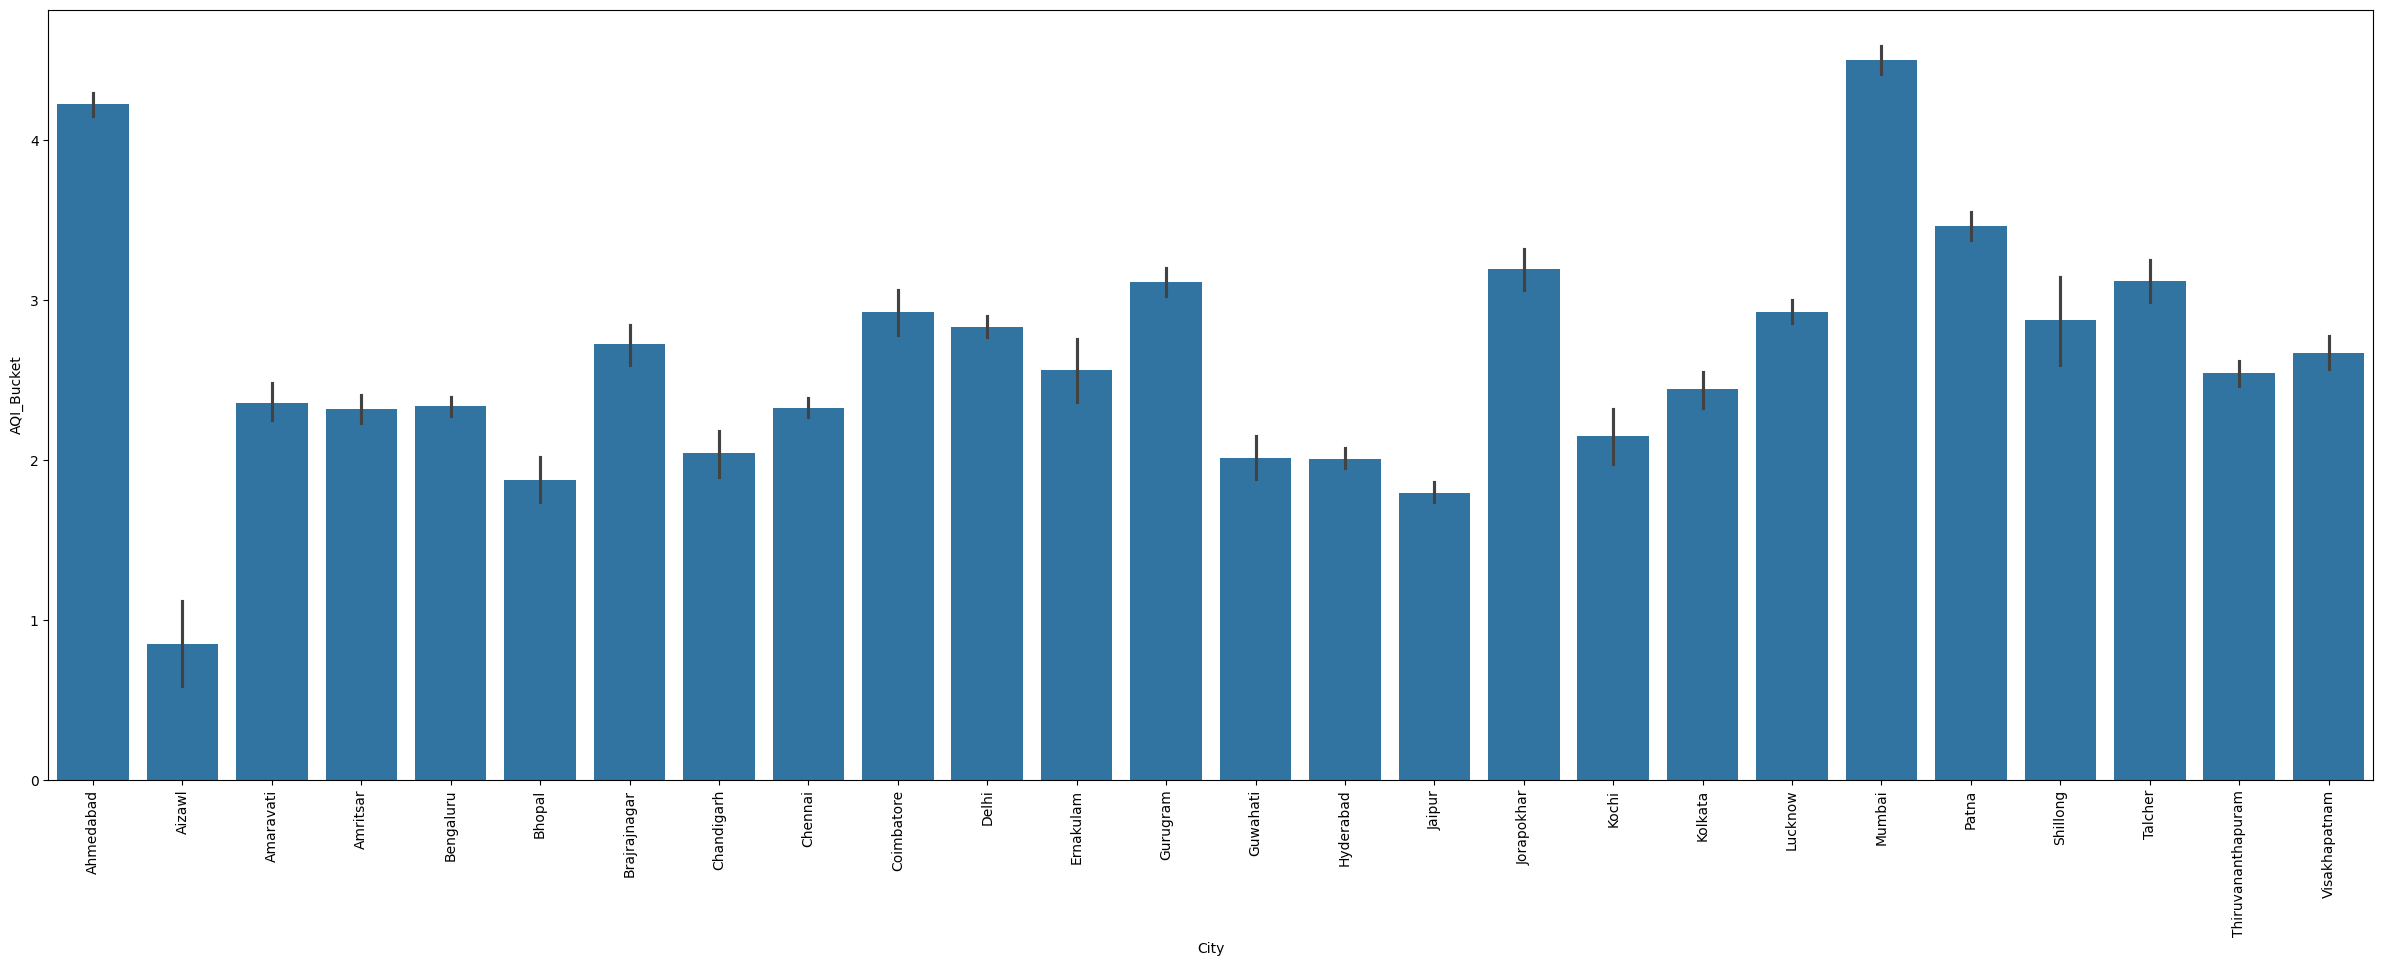

In [43]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='AQI_Bucket',data=df)

<Axes: xlabel='City'>

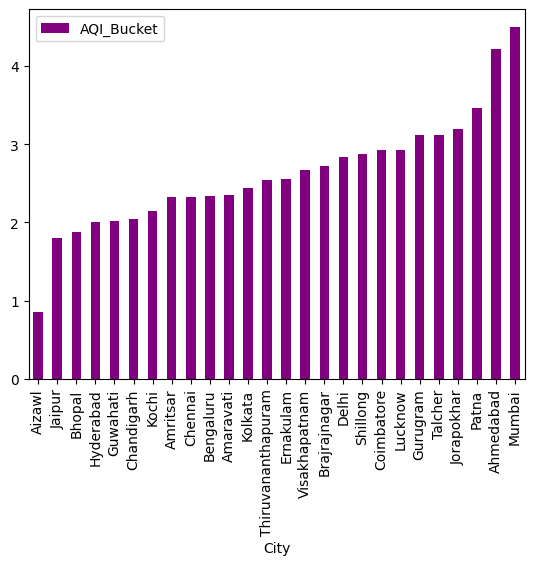

In [44]:
df[['AQI_Bucket','City']].groupby(["City"]).mean().sort_values(by='AQI_Bucket').plot.bar(color='purple')

# Checking all null values and treating those null values.

In [45]:
null_values = df.isnull().sum().sort_values(ascending=False)

In [46]:
null_values

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
AQI_Bucket        0
dtype: int64

In [47]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [48]:
missing_data_with_percentage = pd.concat([null_values, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [49]:
missing_data_with_percentage

Total    Percent
Xylene      18109  61.322001
PM10        11140  37.723071
NH3         10328  34.973418
Toluene      8041  27.229014
Benzene      5623  19.041008
AQI          4681  15.851139
PM2.5        4598  15.570079
NOx          4185  14.171549
O3           4022  13.619586
SO2          3854  13.050692
NO2          3585  12.139785
NO           3582  12.129626
CO           2059   6.972334
City            0   0.000000
Date            0   0.000000
AQI_Bucket      0   0.000000

In [50]:
df.drop(['City'],axis=1,inplace=True)
df.drop(['Date'],axis=1,inplace=True)

In [51]:
df.isnull().sum()

PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket        0
dtype: int64

In [52]:
df.fillna(0, inplace=True)

In [53]:
df.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [54]:
df

PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
0       0.00   0.00   0.92  18.22  17.15   0.00   0.92  27.64  133.36   
1       0.00   0.00   0.97  15.69  16.46   0.00   0.97  24.55   34.06   
2       0.00   0.00  17.40  19.30  29.70   0.00  17.40  29.07   30.70   
3       0.00   0.00   1.70  18.48  17.97   0.00   1.70  18.59   36.08   
4       0.00   0.00  22.10  21.42  37.76   0.00  22.10  39.33   39.31   
...      ...    ...    ...    ...    ...    ...    ...    ...     ...   
29526  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   23.30   
29527  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   30.14   
29528  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   30.96   
29529  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   28.30   
29530  15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   17.05   

       Benzene  Toluene  Xylene   AQI  AQI_Bucket  
0         0.00     0.02    0.00   0.0           6  
1         3.68     5.50    3.77   0.0           6  
2         6.80    16.40    2.25   0.0           6  
3         4.43    10.14    1.00   0.0           6  
4         7.01    18.89    2.78   0.0           6  
...        ...      ...     ...   ...         ...  
29526     2.24    12.07    0.73  41.0           0  
29527     0.74     2.21    0.38  70.0           3  
29528     0.01     0.01    0.00  68.0           3  
29529     0.00     0.00    0.00  54.0           3  
29530     0.00     0.00    0.00  50.0           0  

[29531 rows x 14 columns]

# CALCULATE AIR QUALITY INDEX BASED ON FORMULA

### Function to calculate PM2.5 individual pollutant index(IPI)

In [55]:
def PM25_IPI(PM25):
  if PM25 <= 30:
    IPI = (PM25/30)*50
  elif PM25 <= 60:
    IPI = 50 + ((PM25-30)/30)*50
  elif PM25 <= 90:
    IPI = 100 + ((PM25-60)/30)*50
  elif PM25 <= 120:
    IPI = 150 + ((PM25-90)/30)*50
  elif PM25 <= 250:
    IPI = 200 + ((PM25-120)/130)*50
  else:
    IPI = 300 + ((PM25-250)/250)*50
  return IPI

df['PM25i'] = df['PM2.5'].apply(PM25_IPI)
data = df[['PM2.5', 'PM25i']]
data

PM2.5      PM25i
0       0.00   0.000000
1       0.00   0.000000
2       0.00   0.000000
3       0.00   0.000000
4       0.00   0.000000
...      ...        ...
29526  15.02  25.033333
29527  24.38  40.633333
29528  22.91  38.183333
29529  16.64  27.733333
29530  15.00  25.000000

[29531 rows x 2 columns]

### Function to calculate PM10 individual pollutant index(IPI)

In [56]:
def PM10_IPI(PM10):
  if PM10 <= 50:
    IPI = (PM10/50)*50
  elif PM10 <= 100:
    IPI = 50 + ((PM10-50)/50)*50
  elif PM10 <= 250:
    IPI = 100 + ((PM10-100)/150)*50
  elif PM10 <= 350:
    IPI = 150 + ((PM10-250)/100)*50
  elif PM10 <= 430:
    IPI = 200 + ((PM10-350)/80)*50
  else:
    IPI = 300 + ((PM10-430)/170)*50
  return IPI
df['PM10i'] = df['PM10'].apply(PM10_IPI)
data = df[['PM10', 'PM10i']]
data


PM10  PM10i
0       0.00   0.00
1       0.00   0.00
2       0.00   0.00
3       0.00   0.00
4       0.00   0.00
...      ...    ...
29526  50.94  50.94
29527  74.09  74.09
29528  65.73  65.73
29529  49.97  49.97
29530  66.00  66.00

[29531 rows x 2 columns]

### Function to calculate NO individual pollutant index(IPI)

In [57]:
def NO_IPI(NO):
  if NO <= 40:
    IPI = (NO/40)*50
  elif NO <= 80:
    IPI = 50 + ((NO-40)/40)*50
  elif NO <= 180:
    IPI = 100 + ((NO-80)/100)*50
  elif NO <= 280:
    IPI = 150 + ((NO-180)/100)*50
  elif NO <= 400:
    IPI = 200 + ((NO-280)/120)*50
  else:
    IPI = 300 + ((NO-400)/600)*50
  return IPI
df['NOi'] = df['NO'].apply(NO_IPI)
data = df[['NO', 'NOi']]
data

NO      NOi
0       0.92   1.1500
1       0.97   1.2125
2      17.40  21.7500
3       1.70   2.1250
4      22.10  27.6250
...      ...      ...
29526   7.68   9.6000
29527   3.42   4.2750
29528   3.45   4.3125
29529   4.05   5.0625
29530   0.40   0.5000

[29531 rows x 2 columns]

### Function to calculate NO2 individual pollutant index(IPI)

In [58]:
def NO2_IPI(NO2):
  if NO2 <= 40:
    IPI = (NO2/40)*50
  elif NO2 <= 80:
    IPI = 50 + ((NO2-40)/40)*50
  elif NO2 <= 180:
    IPI = 100 + ((NO2-80)/100)*50
  elif NO2 <= 280:
    IPI = 150 + ((NO2-180)/100)*50
  elif NO2 <= 400:
    IPI = 200 + ((NO2-280)/120)*50
  else:
    IPI = 300 + ((NO2-400)/600)*50
  return IPI
df['NO2i'] = df['NO2'].apply(NO2_IPI)
data = df[['NO2', 'NO2i']]
data

NO2     NO2i
0      18.22  22.7750
1      15.69  19.6125
2      19.30  24.1250
3      18.48  23.1000
4      21.42  26.7750
...      ...      ...
29526  25.06  31.3250
29527  26.06  32.5750
29528  29.53  36.9125
29529  29.26  36.5750
29530  26.85  33.5625

[29531 rows x 2 columns]

### Function to calculate NOx individual pollutant index(IPI)

In [59]:
def NOx_IPI(NOx):
  if NOx <= 40:
    IPI = (NOx/40)*50
  elif NOx <= 80:
    IPI = 50 + ((NOx-40)/40)*50
  elif NOx <= 180:
    IPI = 100 + ((NOx-80)/100)*50
  elif NOx <= 280:
    IPI = 150 + ((NOx-180)/100)*50
  elif NOx <= 400:
    IPI = 200 + ((NOx-280)/120)*50
  else:
    IPI = 300 + ((NOx-400)/600)*50
  return IPI
df['NOxi'] = df['NOx'].apply(NOx_IPI)
data = df[['NOx', 'NOxi']]
data


NOx     NOxi
0      17.15  21.4375
1      16.46  20.5750
2      29.70  37.1250
3      17.97  22.4625
4      37.76  47.2000
...      ...      ...
29526  19.54  24.4250
29527  16.53  20.6625
29528  18.33  22.9125
29529  18.80  23.5000
29530  14.05  17.5625

[29531 rows x 2 columns]

### Function to calculate NH3 individual pollutant index(IPI)

In [60]:
def NH3_IPI(NH3):
  if NH3 <= 200:
    IPI = (NH3/200)*50
  elif NH3 <= 400:
    IPI = 50 + ((NH3-200)/200)*50
  elif NH3 <= 800:
    IPI = 100 + ((NH3-400)/400)*50
  elif NH3 <= 1200:
    IPI = 150 + ((NH3-800)/400)*50
  elif NH3 <= 1800:
    IPI = 200 + ((NH3-1200)/600)*50
  else:
    IPI = 300 + ((NH3-1800)/1200)*50
  return IPI
df['NH3i'] = df['NH3'].apply(NH3_IPI)
data = df[['NH3', 'NH3i']]
data

NH3    NH3i
0       0.00  0.0000
1       0.00  0.0000
2       0.00  0.0000
3       0.00  0.0000
4       0.00  0.0000
...      ...     ...
29526  12.47  3.1175
29527  11.99  2.9975
29528  10.71  2.6775
29529  10.03  2.5075
29530   5.20  1.3000

[29531 rows x 2 columns]

### Function to calculate CO individual pollutant index(IPI)

In [61]:
def CO_IPI(CO):
  if CO <= 1:
    IPI = (CO/1)*50
  elif CO <= 2:
    IPI = 50 + ((CO-1)/1)*50
  elif CO <= 10:
    IPI = 100 + ((CO-2)/8)*50
  elif CO <= 17:
    IPI = 150 + ((CO-10)/7)*50
  elif CO <= 34:
    IPI = 200 + ((CO-17)/17)*50
  else:
    IPI = 300 + ((CO-34)/66)*50
  return IPI
df['COi'] = df['CO'].apply(CO_IPI)
data = df[['CO', 'COi']]
data


CO         COi
0       0.92   46.000000
1       0.97   48.500000
2      17.40  201.176471
3       1.70   85.000000
4      22.10  215.000000
...      ...         ...
29526   0.47   23.500000
29527   0.52   26.000000
29528   0.48   24.000000
29529   0.52   26.000000
29530   0.59   29.500000

[29531 rows x 2 columns]

### Function to calculate SO2 individual pollutant index(IPI)

In [62]:
def SO2_IPI(SO2):
  if SO2 <= 40:
    IPI = (SO2/40)*50
  elif SO2 <= 80:
    IPI = 50 + ((SO2-40)/40)*50
  elif SO2 <= 380:
    IPI = 100 + ((SO2-80)/300)*50
  elif SO2 <= 800:
    IPI = 150 + ((SO2-380)/420)*50
  elif SO2 <= 1600:
    IPI = 200 + ((SO2-800)/800)*50
  else:
    IPI = 300 + ((SO2-1600)/2400)*50
  return IPI
df['SO2i'] = df['SO2'].apply(SO2_IPI)
data = df[['SO2', 'SO2i']]
data

SO2     SO2i
0      27.64  34.5500
1      24.55  30.6875
2      29.07  36.3375
3      18.59  23.2375
4      39.33  49.1625
...      ...      ...
29526   8.55  10.6875
29527  12.72  15.9000
29528   8.42  10.5250
29529   9.84  12.3000
29530   2.10   2.6250

[29531 rows x 2 columns]

### Function to calculate O3 individual pollutant index(IPI)

In [63]:
def O3_IPI(O3):
  if O3 <= 50:
    IPI = (O3/50)*50
  elif O3 <= 100:
    IPI = 50 + ((O3-50)/50)*50
  elif O3 <= 168:
    IPI = 100 + ((O3-100)/68)*50
  elif O3 <= 208:
    IPI = 150 + ((O3-168)/40)*50
  elif O3 <= 748:
    IPI = 200 + ((O3-208)/540)*50
  else:
    IPI = 300 + ((O3-748)/1752)*50
  return IPI
df['O3i'] = df['O3'].apply(O3_IPI)
data = df[['O3', 'O3i']]
data

O3         O3i
0      133.36  124.529412
1       34.06   34.060000
2       30.70   30.700000
3       36.08   36.080000
4       39.31   39.310000
...       ...         ...
29526   23.30   23.300000
29527   30.14   30.140000
29528   30.96   30.960000
29529   28.30   28.300000
29530   17.05   17.050000

[29531 rows x 2 columns]

### Function to calculate Benzene individual pollutant index(IPI)

In [64]:
def Benzene_IPI(Benzene):
  if Benzene <= 3:
    IPI = (Benzene/3)*50
  elif Benzene <= 6:
    IPI = 50 + ((Benzene-3)/3)*50
  elif Benzene <= 12:
    IPI = 100 + ((Benzene-6)/6)*50
  elif Benzene <= 24:
    IPI = 150 + ((Benzene-12)/12)*50
  elif Benzene <= 100:
    IPI = 200 + ((Benzene-24)/76)*50
  else:
    IPI = 300 + ((Benzene-100)/900)*50
  return IPI
df['Benzenei'] = df['Benzene'].apply(Benzene_IPI)
data = df[['Benzene', 'Benzenei']]
data

Benzene    Benzenei
0         0.00    0.000000
1         3.68   61.333333
2         6.80  106.666667
3         4.43   73.833333
4         7.01  108.416667
...        ...         ...
29526     2.24   37.333333
29527     0.74   12.333333
29528     0.01    0.166667
29529     0.00    0.000000
29530     0.00    0.000000

[29531 rows x 2 columns]

### Function to calculate Toluene individual pollutant index(IPI)

In [65]:
def Toluene_IPI(Toluene):
  if Toluene <= 20:
    IPI = (Toluene/20)*50
  elif Toluene <= 40:
    IPI = 50 + ((Toluene-20)/20)*50
  elif Toluene <= 100:
    IPI = 100 + ((Toluene-40)/60)*50
  elif Toluene <= 200:
    IPI = 150 + ((Toluene-100)/100)*50
  elif Toluene <= 600:
    IPI = 200 + ((Toluene-200)/400)*50
  else:
    IPI = 300 + ((Toluene-600)/1400)*50
  return IPI
df['Toluenei'] = df['Toluene'].apply(Toluene_IPI)
data = df[['Toluene', 'Toluenei']]
data

Toluene  Toluenei
0         0.02     0.050
1         5.50    13.750
2        16.40    41.000
3        10.14    25.350
4        18.89    47.225
...        ...       ...
29526    12.07    30.175
29527     2.21     5.525
29528     0.01     0.025
29529     0.00     0.000
29530     0.00     0.000

[29531 rows x 2 columns]

### Function to calculate Xylene individual pollutant index(IPI)

In [66]:
def Xylene_IPI(Xylene):
  if Xylene <= 2:
    IPI = (Xylene/2)*50
  elif Xylene <= 4:
    IPI = 50 + ((Xylene-2)/2)*50
  elif Xylene <= 8:
    IPI = 100 + ((Xylene-4)/4)*50
  elif Xylene <= 16:
    IPI = 150 + ((Xylene-8)/8)*50
  elif Xylene <= 80:
    IPI = 200 + ((Xylene-16)/64)*50
  else:
    IPI = 300 + ((Xylene-80)/720)*50
  return IPI
df['Xylenei'] = df['Xylene'].apply(Xylene_IPI)
data = df[['Xylene', 'Xylenei']]
data

Xylene  Xylenei
0        0.00     0.00
1        3.77    94.25
2        2.25    56.25
3        1.00    25.00
4        2.78    69.50
...       ...      ...
29526    0.73    18.25
29527    0.38     9.50
29528    0.00     0.00
29529    0.00     0.00
29530    0.00     0.00

[29531 rows x 2 columns]

### Function to calculate the air quality index (AQI) of every data value

In [67]:
def AQI(PM25i, PM10i, NOi, NO2i, NOxi, NH3i, COi, SO2i, O3i, Benzenei, Toluenei, Xylenei):
  pollutant_list = [PM25i, PM10i, NOi, NO2i, NOxi, NH3i, COi, SO2i, O3i, Benzenei, Toluenei, Xylenei]
  AQI = max(pollutant_list)
  return AQI
df['AQI'] = df.apply(lambda x: AQI(x['PM25i'], x['PM10i'], x['NOi'], x['NO2i'], x['NOxi'], x['NH3i'], x['COi'], x['SO2i'], x['O3i'], x['Benzenei'], x['Toluenei'], x['Xylenei']), axis=1)
data = df[['PM25i', 'PM10i', 'NOi', 'NO2i', 'NOxi', 'NH3i', 'COi', 'SO2i', 'O3i', 'Benzenei', 'Toluenei', 'Xylenei', 'AQI']]
data


PM25i  PM10i      NOi     NO2i     NOxi    NH3i         COi  \
0       0.000000   0.00   1.1500  22.7750  21.4375  0.0000   46.000000   
1       0.000000   0.00   1.2125  19.6125  20.5750  0.0000   48.500000   
2       0.000000   0.00  21.7500  24.1250  37.1250  0.0000  201.176471   
3       0.000000   0.00   2.1250  23.1000  22.4625  0.0000   85.000000   
4       0.000000   0.00  27.6250  26.7750  47.2000  0.0000  215.000000   
...          ...    ...      ...      ...      ...     ...         ...   
29526  25.033333  50.94   9.6000  31.3250  24.4250  3.1175   23.500000   
29527  40.633333  74.09   4.2750  32.5750  20.6625  2.9975   26.000000   
29528  38.183333  65.73   4.3125  36.9125  22.9125  2.6775   24.000000   
29529  27.733333  49.97   5.0625  36.5750  23.5000  2.5075   26.000000   
29530  25.000000  66.00   0.5000  33.5625  17.5625  1.3000   29.500000   

          SO2i         O3i    Benzenei  Toluenei  Xylenei         AQI  
0      34.5500  124.529412    0.000000     0.050     0.00  124.529412  
1      30.6875   34.060000   61.333333    13.750    94.25   94.250000  
2      36.3375   30.700000  106.666667    41.000    56.25  201.176471  
3      23.2375   36.080000   73.833333    25.350    25.00   85.000000  
4      49.1625   39.310000  108.416667    47.225    69.50  215.000000  
...        ...         ...         ...       ...      ...         ...  
29526  10.6875   23.300000   37.333333    30.175    18.25   50.940000  
29527  15.9000   30.140000   12.333333     5.525     9.50   74.090000  
29528  10.5250   30.960000    0.166667     0.025     0.00   65.730000  
29529  12.3000   28.300000    0.000000     0.000     0.00   49.970000  
29530   2.6250   17.050000    0.000000     0.000     0.00   66.000000  

[29531 rows x 13 columns]

In [68]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df

PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
0       0.00   0.00   0.92  18.22  17.15   0.00   0.92  27.64  133.36   
1       0.00   0.00   0.97  15.69  16.46   0.00   0.97  24.55   34.06   
2       0.00   0.00  17.40  19.30  29.70   0.00  17.40  29.07   30.70   
3       0.00   0.00   1.70  18.48  17.97   0.00   1.70  18.59   36.08   
4       0.00   0.00  22.10  21.42  37.76   0.00  22.10  39.33   39.31   
...      ...    ...    ...    ...    ...    ...    ...    ...     ...   
29526  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   23.30   
29527  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   30.14   
29528  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   30.96   
29529  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   28.30   
29530  15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   17.05   

       Benzene  ...     NO2i     NOxi    NH3i         COi     SO2i  \
0         0.00  ...  22.7750  21.4375  0.0000   46.000000  34.5500   
1         3.68  ...  19.6125  20.5750  0.0000   48.500000  30.6875   
2         6.80  ...  24.1250  37.1250  0.0000  201.176471  36.3375   
3         4.43  ...  23.1000  22.4625  0.0000   85.000000  23.2375   
4         7.01  ...  26.7750  47.2000  0.0000  215.000000  49.1625   
...        ...  ...      ...      ...     ...         ...      ...   
29526     2.24  ...  31.3250  24.4250  3.1175   23.500000  10.6875   
29527     0.74  ...  32.5750  20.6625  2.9975   26.000000  15.9000   
29528     0.01  ...  36.9125  22.9125  2.6775   24.000000  10.5250   
29529     0.00  ...  36.5750  23.5000  2.5075   26.000000  12.3000   
29530     0.00  ...  33.5625  17.5625  1.3000   29.500000   2.6250   

              O3i    Benzenei  Toluenei  Xylenei  AQI_Range  
0      124.529412    0.000000     0.050     0.00       Poor  
1       34.060000   61.333333    13.750    94.25   Moderate  
2       30.700000  106.666667    41.000    56.25  Unhealthy  
3       36.080000   73.833333    25.350    25.00   Moderate  
4       39.310000  108.416667    47.225    69.50  Unhealthy  
...           ...         ...       ...      ...        ...  
29526   23.300000   37.333333    30.175    18.25   Moderate  
29527   30.140000   12.333333     5.525     9.50   Moderate  
29528   30.960000    0.166667     0.025     0.00   Moderate  
29529   28.300000    0.000000     0.000     0.00       Good  
29530   17.050000    0.000000     0.000     0.00   Moderate  

[29531 rows x 27 columns]

In [69]:
df['AQI_Range'].value_counts()

AQI_Range
Poor              11512
Moderate           8183
Good               5353
Unhealthy          3460
Very unhealthy     1007
Hazardous            16
Name: count, dtype: int64

### Splitting the dataset into Dependent and Independent columns

In [70]:
X = df[['PM25i', 'PM10i', 'NOi', 'NO2i', 'NOxi', 'NH3i', 'COi', 'SO2i', 'O3i', 'Benzenei', 'Toluenei', 'Xylenei']]
Y = df['AQI']
X

PM25i  PM10i      NOi     NO2i     NOxi    NH3i         COi  \
0       0.000000   0.00   1.1500  22.7750  21.4375  0.0000   46.000000   
1       0.000000   0.00   1.2125  19.6125  20.5750  0.0000   48.500000   
2       0.000000   0.00  21.7500  24.1250  37.1250  0.0000  201.176471   
3       0.000000   0.00   2.1250  23.1000  22.4625  0.0000   85.000000   
4       0.000000   0.00  27.6250  26.7750  47.2000  0.0000  215.000000   
...          ...    ...      ...      ...      ...     ...         ...   
29526  25.033333  50.94   9.6000  31.3250  24.4250  3.1175   23.500000   
29527  40.633333  74.09   4.2750  32.5750  20.6625  2.9975   26.000000   
29528  38.183333  65.73   4.3125  36.9125  22.9125  2.6775   24.000000   
29529  27.733333  49.97   5.0625  36.5750  23.5000  2.5075   26.000000   
29530  25.000000  66.00   0.5000  33.5625  17.5625  1.3000   29.500000   

          SO2i         O3i    Benzenei  Toluenei  Xylenei  
0      34.5500  124.529412    0.000000     0.050     0.00  
1      30.6875   34.060000   61.333333    13.750    94.25  
2      36.3375   30.700000  106.666667    41.000    56.25  
3      23.2375   36.080000   73.833333    25.350    25.00  
4      49.1625   39.310000  108.416667    47.225    69.50  
...        ...         ...         ...       ...      ...  
29526  10.6875   23.300000   37.333333    30.175    18.25  
29527  15.9000   30.140000   12.333333     5.525     9.50  
29528  10.5250   30.960000    0.166667     0.025     0.00  
29529  12.3000   28.300000    0.000000     0.000     0.00  
29530   2.6250   17.050000    0.000000     0.000     0.00  

[29531 rows x 12 columns]

In [71]:
Y

0        124.529412
1         94.250000
2        201.176471
3         85.000000
4        215.000000
            ...    
29526     50.940000
29527     74.090000
29528     65.730000
29529     49.970000
29530     66.000000
Name: AQI, Length: 29531, dtype: float64

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(23624, 12) (5907, 12) (23624,) (5907,)


### Linear Regression

In [73]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [74]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [75]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  30.123813583927504
RMSE TestData =  31.15377687041824
--------------------------------------------------
RSquared value on train: 0.829448696532137
RSquared value on test: 0.8180352667144376


### Decision Tree Regressor

In [76]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [77]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [78]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  9.314863714593506e-16
RMSE TestData =  5.506844393678403
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9943144638561875


### Random Forest Regressor

In [79]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [80]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [81]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  1.4876164045077802
RMSE TestData =  4.844379754924158
--------------------------------------------------
RSquared value on train: 0.9995840730534001
RSquared value on test: 0.9956001063821939


### XG Boost Regressor

In [82]:
XGB=XGBRegressor().fit(X_train,Y_train)

In [83]:
train_preds3=XGB.predict(X_train)
test_preds3=XGB.predict(X_test)

In [84]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds3)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds3)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',XGB.score(X_train, Y_train))
print('RSquared value on test:',XGB.score(X_test, Y_test))

RMSE TrainingData =  2.5413977636564127
RMSE TestData =  6.23218203945237
--------------------------------------------------
RSquared value on train: 0.998786106944177
RSquared value on test: 0.9927180771080245
